In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
DATA_PATH = '../dados/processados/sexo_estados.csv'
df = pd.read_csv(DATA_PATH, index_col=0)
df = df.reset_index(drop=True)
df

,SG_UF_NOT,CS_SEXO,qtd,taxa
0,AC,F,52,11.629207
1,AC,M,97,21.684700
2,AL,F,503,28.828139
3,AL,M,677,42.147361
4,AM,F,2248,107.273097
5,AM,M,3451,163.389719
6,AP,F,67,15.571292
7,AP,M,89,20.626011
8,BA,F,1335,17.391139
9,BA,M,1597,22.015133


In [3]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='taxa', anova_model='taxa ~ C(CS_SEXO)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(CS_SEXO),1.0,2972.491557,2972.491557,2.317385,0.133993
Residual,52.0,66699.989072,1282.692098,NaN,NaN


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('taxa ~ C(CS_SEXO)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(CS_SEXO),2972.491557,1.0,2.317385,0.133993
Residual,66699.989072,52.0,NaN,NaN


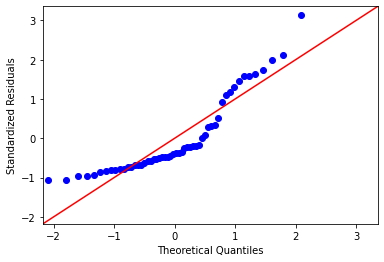

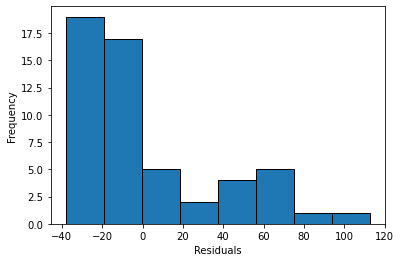

In [6]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [7]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.8356453776359558 3.2202419788518455e-06


In [8]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df, res_var='taxa', xfac_var='CS_SEXO')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.9494
1,Degrees of freedom (Df),1.0000
2,p value,0.3344
